In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

In [8]:
filename = 'EyeGEx_retina.counts.matrix.gct'
gct_full = pd.read_table(filename, header = 2,delim_whitespace=True)

In [4]:
gct_full.shape

(58051, 455)

In [5]:
# remove name and description in matrix
gct_name = gct_full[['NAME']]
gct_desc = gct_full[['Description']]
gct_data = gct_full.drop(columns=['NAME','Description'])
gct_data.head()

,100_2,101_3,102_2,103_3,104_2,105_2,106_4,107_4,109_1,11_4,...,90_2,91_2,92_3,93_2,94_4,95_4,96_3,97_2,98_3,99_1
0,225.00,252.0,136.0,166.0,207.0,121.0,127.0,304.0,227.0,224.0,...,132.0,149.0,186.0,71.0,272.0,136.0,324.0,158.0,168.0,167.0
1,0.00,0.0,1.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0
2,254.00,301.0,173.0,264.0,307.0,140.0,164.0,279.0,216.0,274.0,...,369.0,148.0,265.0,86.0,326.0,283.0,300.0,242.0,286.0,207.0
3,422.99,510.0,272.0,301.0,417.0,116.0,198.0,278.0,243.0,297.0,...,274.0,163.0,227.0,96.0,418.0,338.0,277.0,342.0,343.0,140.0
4,272.00,310.0,204.0,224.0,227.0,149.0,253.0,171.0,274.0,198.0,...,280.0,168.0,308.0,86.0,284.0,260.0,179.0,210.0,225.0,124.0


In [6]:
# remove genes with 0 expression for all samples
zeroGenes = (gct_data.iloc[:, :] == 0).all(axis=1)
filteredData = gct_data.loc[~zeroGenes, :]
print(filteredData.shape)

(45297, 453)


In [7]:
# need to normalize/scale the data in order to avoud biases with varaibles of larger magnitude
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(filteredData.T)
gct_scaled = scaler.transform(filteredData.T)
gct_scaled = pd.DataFrame(gct_scaled.T)
print(gct_scaled.shape)
print('mean: ',gct_scaled.mean(axis=1))
print('std: ',gct_scaled.std(axis=1))

(45297, 453)
mean:  0       -2.553758e-16
1       -4.823221e-16
2        2.203290e-16
3       -1.284231e-16
4       -4.279138e-16
             ...     
45292   -1.182522e-16
45293   -1.754790e-16
45294    1.727065e-17
45295    1.225412e-17
45296    1.007288e-16
Length: 45297, dtype: float64
std:  0        1.001106
1        1.001106
2        1.001106
3        1.001106
4        1.001106
           ...   
45292    1.001106
45293    1.001106
45294    1.001106
45295    1.001106
45296    1.001106
Length: 45297, dtype: float64


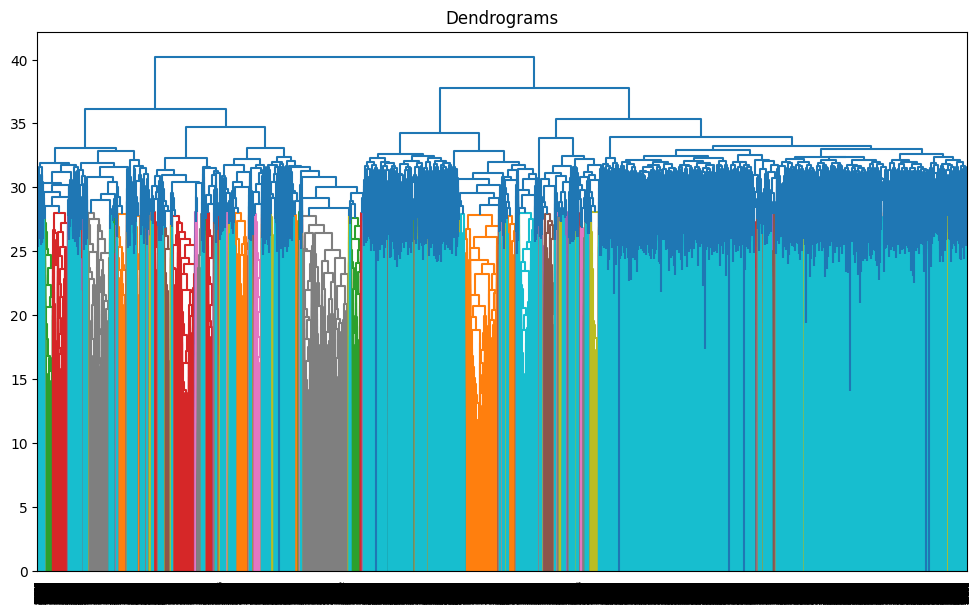

In [17]:
plt.figure(figsize=(12, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(gct_scaled, method='complete'))
# x-axis contains the genes
# y-axis contains the distances between these genes

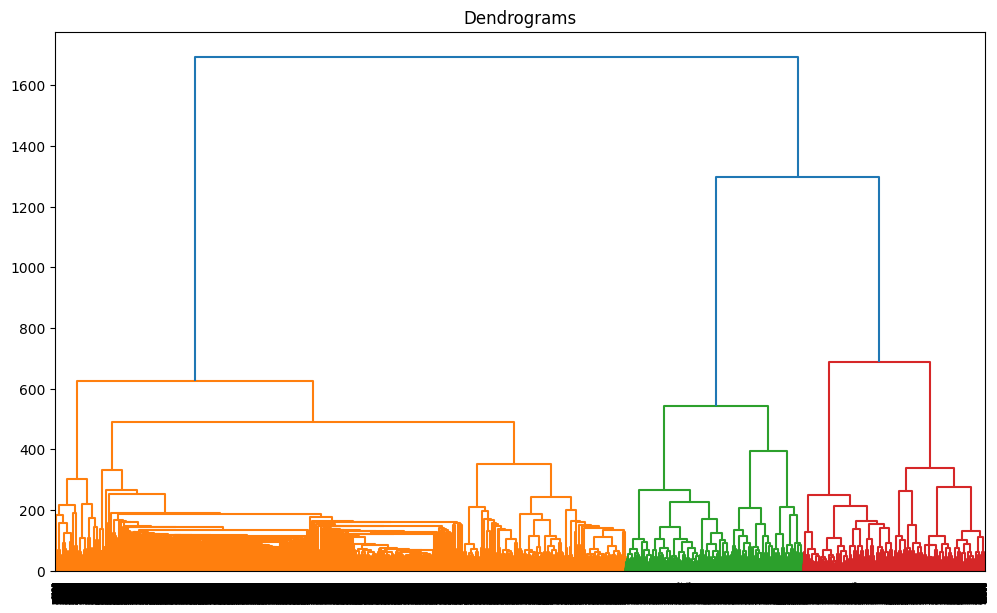

In [18]:
plt.figure(figsize=(12, 7))  
plt.title("Dendrograms")  
# Ward linkage minimizes the variance between clusters
dend = shc.dendrogram(shc.linkage(gct_scaled, method='ward'))